# Predicting mental health treatment need using machine learning
A classification model that predicts whether a person is likely to seek or need mental health treatment, based on survey responses. The insights can help organizations or clinics identify high-risk groups and encourage early intervention. 

This project will be a full data pipeline (cleaning → EDA → feature engineering → modeling → evaluation).

This part 1 will cover: cleaning → EDA → feature engineering

## 1. Problem definition

Statement
> Given information about an employee's demographics, workplace conditions, and personal history regarding mental health, can we predict whether they are likely to seek treatment for mental health issues?

## 2. Data

The data is a structured (CSV) and static data from Kaggle - https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

## 3. Success Criteria

> If we can achieve at least 85% <u>accuracy</u> in predicting whether a person will seek mental health treatment - along with a recall score above 80% for the positive class — we will consider the model effective and suitable for further development and deployment.

## 4. Features
This shows different information about each of the features in the data. 

1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition? (This will be our target variable)
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
27. comments: Any additional notes or comments

### Preparing the tools

I will be using pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools I need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
df = pd.read_csv("data/mental-health-in-tech-survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.shape

(1259, 27)

In [6]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.1 Data Cleaning

In [8]:
# Parse data and sort by Timestamp since it's a time series data
df_tmp = pd.read_csv("data/mental-health-in-tech-survey.csv", parse_dates=["Timestamp"])
df_tmp.sort_values(by=["Timestamp"], inplace=True)

# Keep only the date (drop time)
df_tmp["Timestamp"] = df_tmp["Timestamp"].dt.date

# Rename column (for reference purpose - will be deleted)
df_tmp.rename(columns={"Timestamp": "Date"}, inplace=True)

In [9]:
# Drop irrelevant/redundant columns - Date and state
df_tmp.drop(columns=["Date", "state"], inplace=True)

In [10]:
# Standardize column names
df_tmp.columns = df_tmp.columns.str.lower().str.replace(" ", "_")
df_tmp.head(10)

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,39,M,Canada,NaN,No,No,Never,1-5,Yes,Yes,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,23,Male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [11]:
df_tmp.isnull().sum()

age                             0
gender                          0
country                         0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [12]:
# Drop columns with many missing data - comments
df_tmp.drop(columns=["comments"], inplace=True)

In [13]:
# Impute work_interfere with 'Not specified'
df_tmp["work_interfere"] = df_tmp["work_interfere"].fillna("Not specified")

# Impute self_employed with 'No'
df_tmp["self_employed"] = df_tmp["self_employed"].fillna("No")

In [14]:
df_tmp.isnull().sum()

age                          0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [15]:
df_tmp.age.value_counts().sort_values

<bound method Series.sort_values of age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58       

In [16]:
# Clean the Age column - remove outliers
df_tmp = df_tmp[(df_tmp["age"] > 17) & (df_tmp["age"] < 75)]

In [17]:
df_tmp.gender.value_counts()

gender
Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man              

In [18]:
# Normalize gender values
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ["male", "m", "man", "male-ish", "maile", "malr", "mal", "msle", "cis male", "cis man", "make", "mail", "guy (-ish) ^_^", "male (cis)", "ostensibly male, unsure what that really means", "something kinda male?"]:
        return "Male"
    elif g in ["female", "f", "woman", "cis female", "cis-female/femme", "female (cis)", "femake", "femail", "trans-female", "female (trans)", "trans woman"]:
        return "Female"
    else:
        return "Other"

df_tmp.loc[:, "gender"] = df_tmp["gender"].apply(clean_gender)

In [19]:
df_tmp["gender"].value_counts()

gender
Male      989
Female    251
Other      11
Name: count, dtype: int64

In [20]:
for col in df_tmp.select_dtypes(include="object").columns:
    print(f"{col}: {df_tmp[col].unique()}\n")

gender: ['Female' 'Male' 'Other']

country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']

self_employed: ['No' 'Yes']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Not specified']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

tech_company: ['Yes' 'No']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know"

In [21]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

gender
country
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence


In [22]:
# Clean for EDA: convert object columns to categories
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1251 non-null   int64   
 1   gender                     1251 non-null   category
 2   country                    1251 non-null   category
 3   self_employed              1251 non-null   category
 4   family_history             1251 non-null   category
 5   treatment                  1251 non-null   category
 6   work_interfere             1251 non-null   category
 7   no_employees               1251 non-null   category
 8   remote_work                1251 non-null   category
 9   tech_company               1251 non-null   category
 10  benefits                   1251 non-null   category
 11  care_options               1251 non-null   category
 12  wellness_program           1251 non-null   category
 13  seek_help                  1251 non-nu

In [24]:
df_tmp.shape

(1251, 24)

In [25]:
# Save cleaned and preprocessed data
df_tmp.to_csv("data/mental-health-in-tech-survey_cleaned.csv",
              index=False)

### 4.2 Data Exploration (Exploratory Data Analysis or EDA)

In [26]:
# Import preprocessed data
df = pd.read_csv("data/mental-health-in-tech-survey_cleaned.csv",
                     low_memory=False)
df.head().T

,0,1,2,3,4
age,37,44,32,31,31
gender,Female,Male,Male,Male,Male
country,United States,United States,Canada,United Kingdom,United States
self_employed,No,No,No,No,No
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500
remote_work,No,No,No,No,Yes
tech_company,Yes,No,Yes,Yes,Yes


#### Distribution of the target variable - Treatment

In [27]:
# Count each set of the target variable
df["treatment"].value_counts()

treatment
Yes    632
No     619
Name: count, dtype: int64

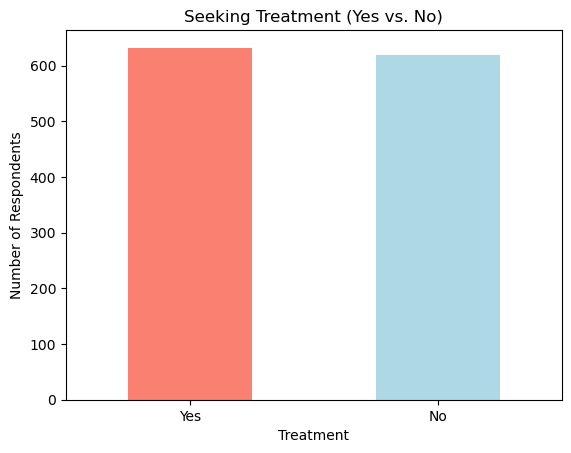

In [28]:
# Distribution of the target
df["treatment"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Seeking Treatment (Yes vs. No)")
plt.xlabel("Treatment")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)

# Save the plot to a file
plt.savefig("images/distribution-of-target.png", dpi=300, bbox_inches='tight')
plt.show()

#### Treatment Frequency according to age

This compares the age column against the treatment column

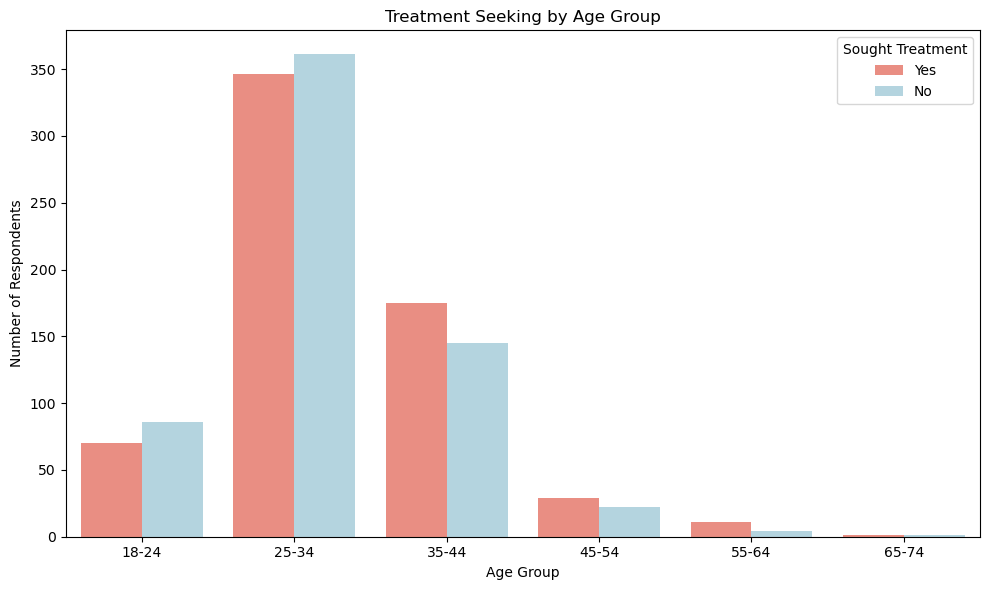

In [29]:
# Create Age groups
bins = [17, 24, 34, 44, 54, 64, 74]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

# Custom palette
custom_palette = {
    "Yes": "salmon",
    "No": "lightblue"
}

# Plot Age vs. treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="age_group", hue="treatment", palette=custom_palette)
plt.title("Treatment Seeking by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.tight_layout()

# Save the plot to a file
plt.savefig("images/distribution-of-age.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
print("Summary Statistics for Age:")
print(df["age"].describe())

Summary Statistics for Age:
count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64


#### Treatment Frequency according to family_history

This compares the family_history column against the treatment column

In [31]:
df.family_history.value_counts()

family_history
No     762
Yes    489
Name: count, dtype: int64

In [32]:
ct_family_treatment = pd.crosstab(df.treatment, df.family_history)
ct_family_treatment

family_history,No,Yes
treatment,,
No,492,127
Yes,270,362


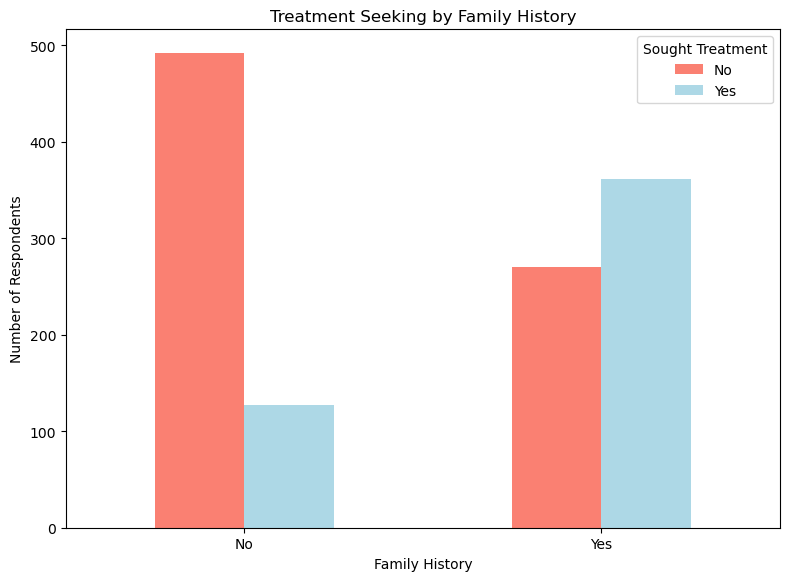

In [33]:
# Create a plot of crosstab
ct_family_treatment.plot(kind="bar", figsize=(8, 6), color=["salmon", "lightblue"])

plt.title("Treatment Seeking by Family History")
plt.xlabel("Family History")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.tight_layout()
plt.xticks(rotation=0)

# Save the plot to a file
plt.savefig("images/distribution-by-family.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Group by gender and family_history columns and count
grouped_df = df.groupby(
    ["gender", "family_history", "treatment"],
    observed=True
).size().reset_index(name="count")
grouped_df

,gender,family_history,treatment,count
0,Female,No,No,52
1,Female,No,Yes,66
2,Female,Yes,No,26
3,Female,Yes,Yes,107
4,Male,No,No,439
5,Male,No,Yes,201
6,Male,Yes,No,100
7,Male,Yes,Yes,249
8,Other,No,No,1
9,Other,No,Yes,3


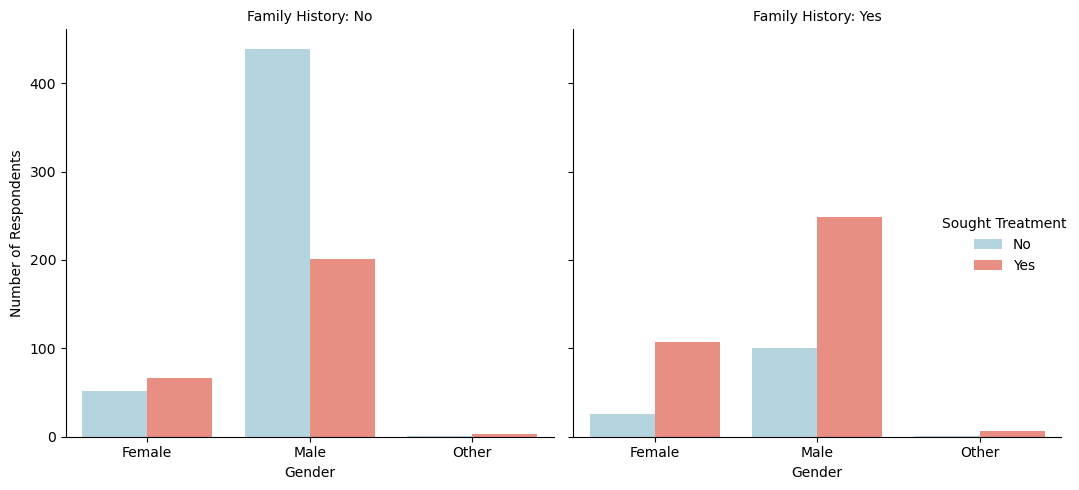

In [35]:
# Plot: One chart for "Family History = Yes", one for "No"
g = sns.catplot(
    data=grouped_df,
    kind="bar",
    x="gender", y="count",
    hue="treatment",
    col="family_history",
    palette=custom_palette,
    height=5, aspect=1
)

g.set_titles("Family History: {col_name}")
g.set_axis_labels("Gender", "Number of Respondents")
g._legend.set_title("Sought Treatment")
plt.tight_layout()

# Save the plot to a file
plt.savefig("images/distributions.png", dpi=300, bbox_inches='tight')
plt.show()

#### Summarized Insights from the EDA

🎯 Target Variable (treatment)
- There is a fairly balanced distribution between respondents who sought treatment and those who didn’t.
- Indicates potential for meaningful classification without heavy imbalance correction.

👵 Age Distribution
- Majority of respondents are between 25 and 44 years old.
- Very few respondents are over 65 or under 18.
- Created meaningful age groups: 18–24, 25–34, etc., which may be useful for modeling.

🚻 Gender
- Most responses came from Male and Female categories.
- Normalization reduced noise and brought clarity to gender-based patterns.

🧠 Family History vs. Treatment
- People with a family history of mental illness were more likely to seek treatment.
- Shows strong potential as a predictive feature.

🔀 Gender + Family History vs. Treatment
- Females with a family history had the highest treatment-seeking rate.
  1. Females with family history:   
    * 107 / (107 + 26) = 80.5% sought treatment
  2. Males with family history:   
    * 249 / (249 + 100) = 71.3% sought treatment
  3. Other with family history:   
    * 6 / (6 + 1) = 85.7% sought treatment
- Males without family history were the least likely to seek treatment.
- Suggests important interactions between features like gender and family history.

### 4.3 Encode data for modeling

In [36]:
df.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,35-44
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,35-44
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,25-34
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,25-34
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,25-34


In [37]:
# For modeling, only age is okay
df.drop("age_group", axis=1, inplace=True)

In [38]:
df.shape

(1251, 24)

In [39]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['self_employed',
 'family_history',
 'treatment',
 'remote_work',
 'tech_company',
 'obs_consequence']

In [40]:
# Map Yes/No or similar to 1/0 - Binary Encoding
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [41]:
# Ordered categories - Ordinal Encoding
work_interfere_map = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Not specified": -1
}
df["work_interfere"] = df["work_interfere"].map(work_interfere_map)

no_employees_map = {
    "1-5": 0, "6-25": 1, "26-100": 2, "100-500": 3, "500-1000": 4, "More than 1000": 5
}
df["no_employees"] = df["no_employees"].map(no_employees_map)

leave_map = {
    "Very easy": 0, "Somewhat easy": 1, "Don't know": 2,
    "Somewhat difficult": 3, "Very difficult": 4
}
df["leave"] = df["leave"].map(leave_map)

In [42]:
# High-cardinality categories (e.g. country) - label encoding

df["country"] = pd.Categorical(df["country"]).codes

In [43]:
# For Small nominal categories - one-hot encoding

one_hot_cols = [
    "gender",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
    "mental_vs_physical",
    "benefits"
]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [44]:
df.head(10)

,age,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,...,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,benefits_No,benefits_Yes
0,37,44,0,0,1,3,1,0,1,1,...,False,True,True,False,False,False,False,True,False,True
1,44,44,0,0,0,1,5,0,0,2,...,False,False,True,False,True,False,False,False,False,False
2,32,6,0,0,0,1,1,0,1,3,...,False,True,False,True,False,True,True,False,True,False
3,31,43,0,1,1,3,2,0,1,3,...,False,False,False,False,False,False,True,False,True,False
4,31,44,0,0,0,0,3,1,1,2,...,False,True,False,True,False,True,False,False,False,True
5,33,44,0,1,0,2,1,0,1,2,...,False,True,True,False,False,False,False,False,False,True
6,35,44,0,1,1,2,0,1,1,3,...,False,False,True,False,True,False,False,False,True,False
7,39,6,0,0,0,0,0,1,1,2,...,False,False,True,False,True,False,True,False,True,False
8,42,44,0,1,1,2,3,0,1,4,...,False,True,True,False,False,False,True,False,False,True
9,23,6,0,0,0,0,2,0,1,2,...,False,True,False,False,False,False,False,True,False,False


In [45]:
df.head(1).T

,0
age,37
country,44
self_employed,0
family_history,0
treatment,1
work_interfere,3
no_employees,1
remote_work,0
tech_company,1
leave,1


In [46]:
# Save data ready for modeling
df.to_csv("data/mental-health-in-tech-survey_ready_for_modeling.csv",
              index=False)